In [2]:
# load all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# read dataset
data = pd.read_csv('train.csv')

In [4]:
data.shape

(1460, 81)

In [8]:
pd.pandas.set_option('display.max_columns', None)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Analysis:
1. Identify Missing values
2. Verify set of numerical variables and these data distribution
3. Verify set of categorical variables and cardinality of these variables
4. Identify Outliers, if any
5. Identify correlation b/w independent and dependent features

In [21]:
# Idenitfy % of missing values present in the dataset 
features_missingval = [features for features in data.columns if data[features].isnull().sum()>0]

for feature in features_missingval:
 print(feature,":", np.round(data[feature].isnull().mean()*100,2), "% missing values")

LotFrontage : 17.74 % missing values
Alley : 93.77 % missing values
MasVnrType : 59.73 % missing values
MasVnrArea : 0.55 % missing values
BsmtQual : 2.53 % missing values
BsmtCond : 2.53 % missing values
BsmtExposure : 2.6 % missing values
BsmtFinType1 : 2.53 % missing values
BsmtFinType2 : 2.6 % missing values
Electrical : 0.07 % missing values
FireplaceQu : 47.26 % missing values
GarageType : 5.55 % missing values
GarageYrBlt : 5.55 % missing values
GarageFinish : 5.55 % missing values
GarageQual : 5.55 % missing values
GarageCond : 5.55 % missing values
PoolQC : 99.52 % missing values
Fence : 80.75 % missing values
MiscFeature : 96.3 % missing values


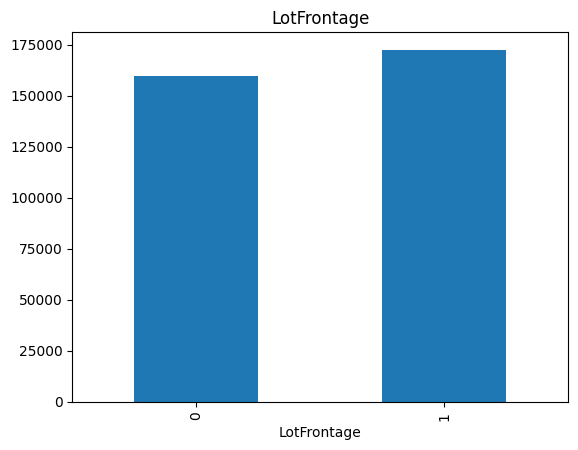

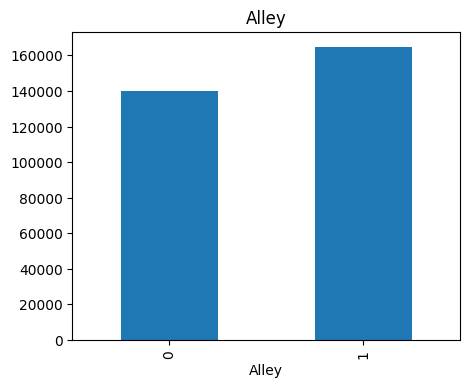

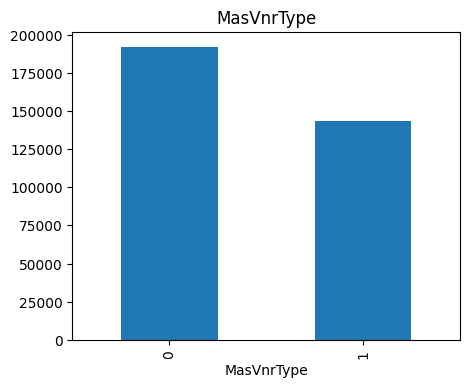

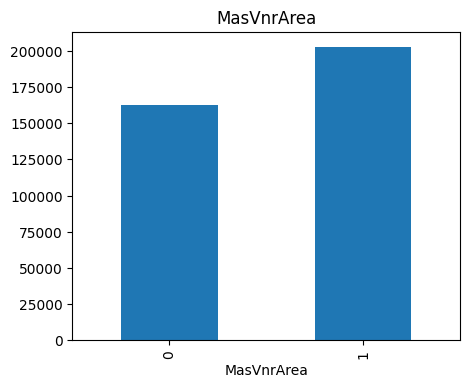

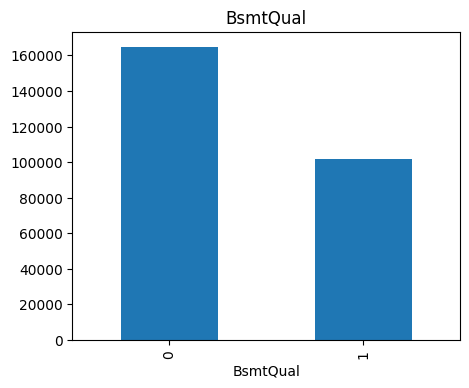

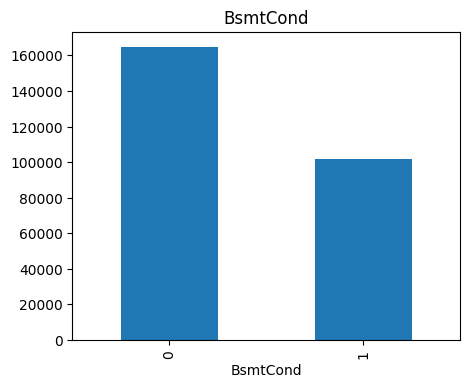

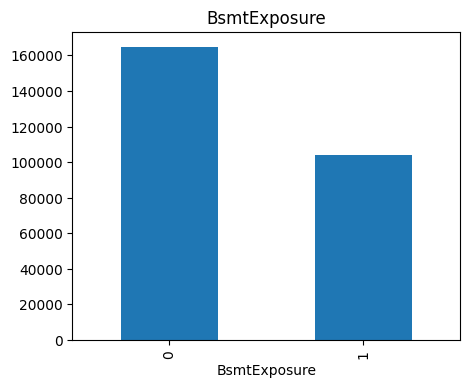

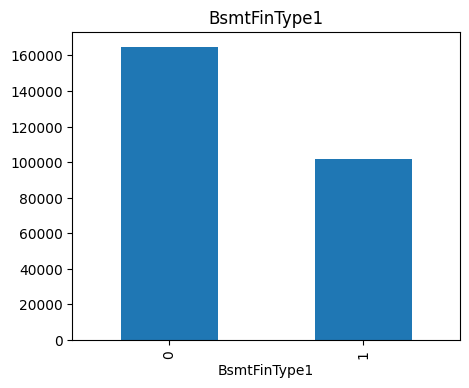

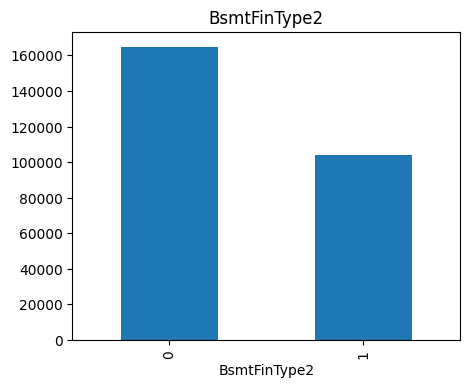

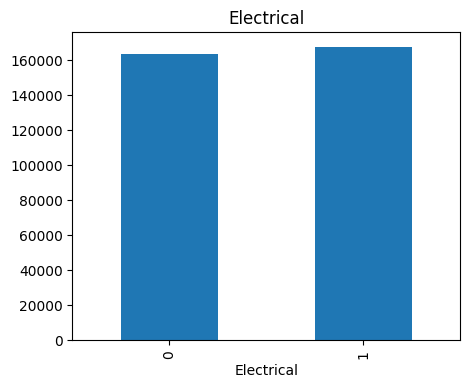

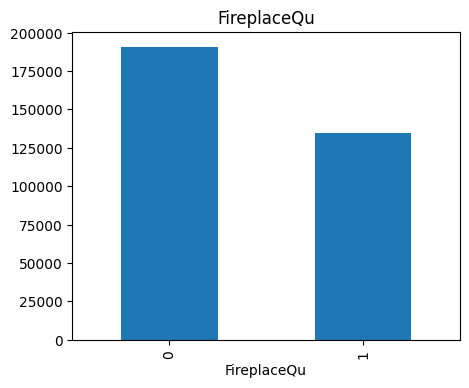

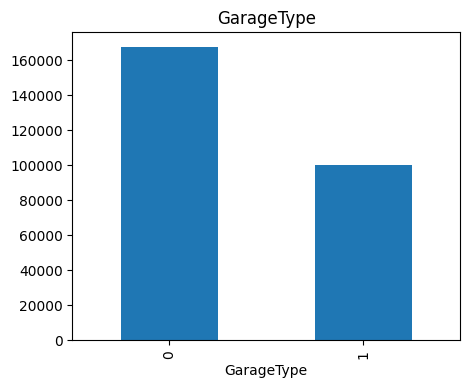

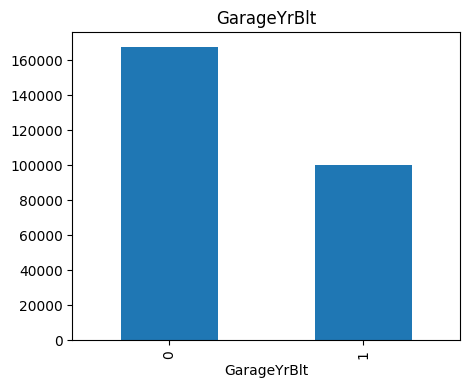

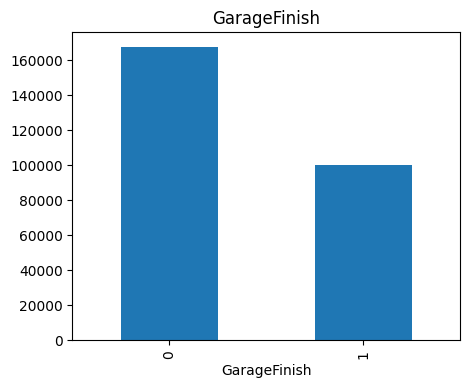

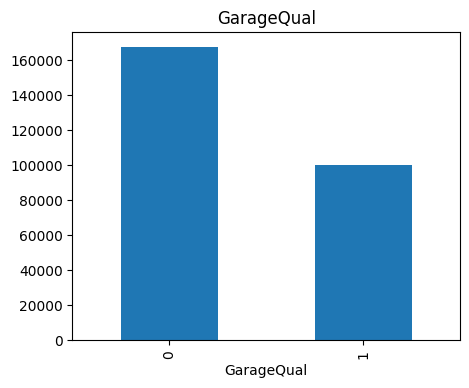

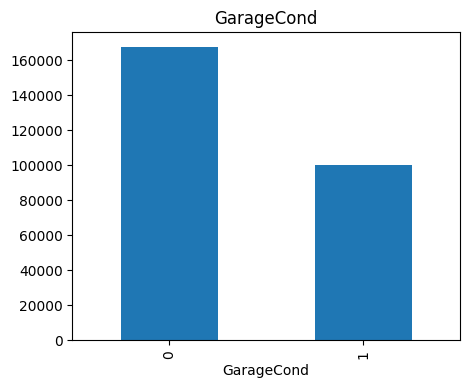

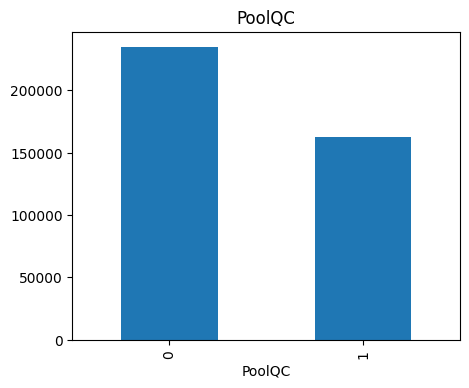

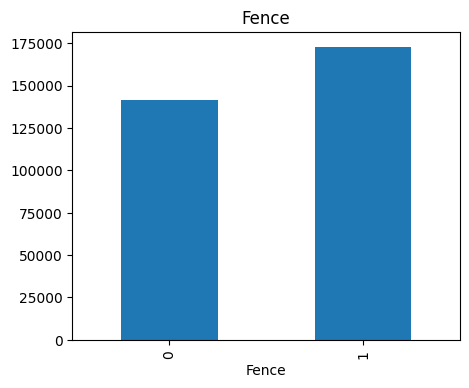

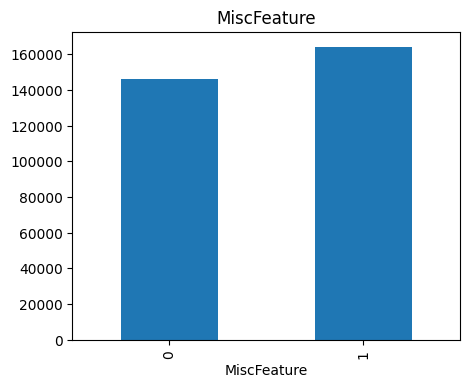

<Figure size 500x400 with 0 Axes>

In [36]:
# Check whether there is a relationship b/w features with missing values and Sales Price
for feature in features_missingval:
    tempdata = data.copy()
    
    # set missing values to 1 in a feature so as to compare its signficance with SalesPrice    
    tempdata[feature] = np.where(data[feature].isnull(), 1,0) 
    
    tempdata.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    
    plt.figure(figsize=(5,4))

From these bar plot, it is evident that there is relationship between missing values of a feature with Sales Prices. We would need to handle Nan values and replace with something which can be accounted during model prediction

In [82]:
# Check for numerical features
num_features = [features for features in data.columns if data[features].dtypes !='O']
print (num_features)


['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [43]:
# there are few date time features. Extract those features to see for any specific relatiosnhip with SalesPrice

year_features = [feature for feature in data.columns if ('Year') in feature or 'Yr' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

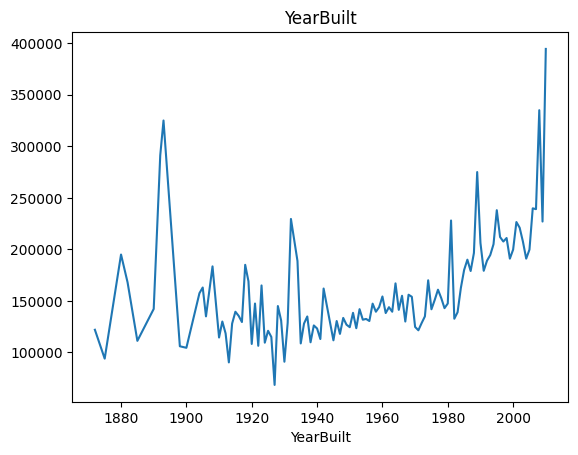

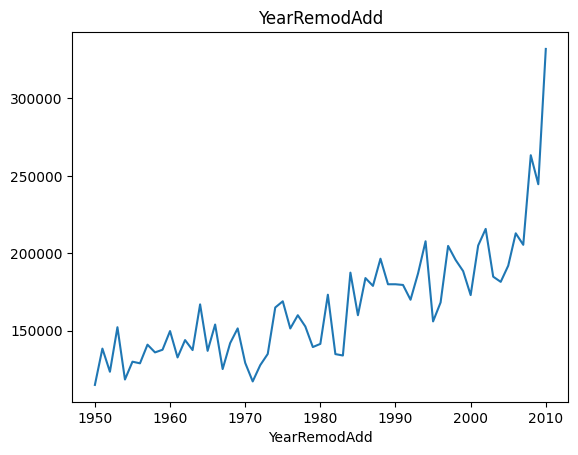

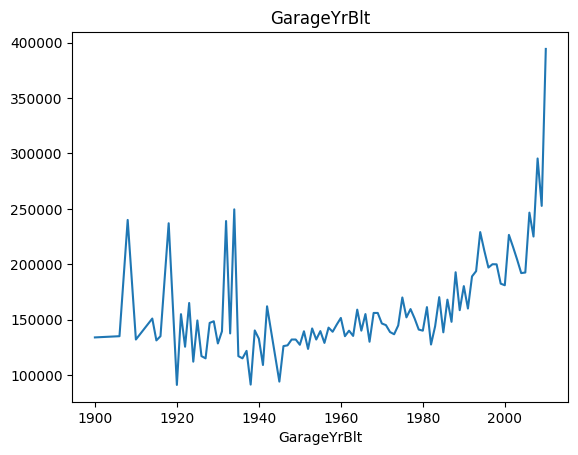

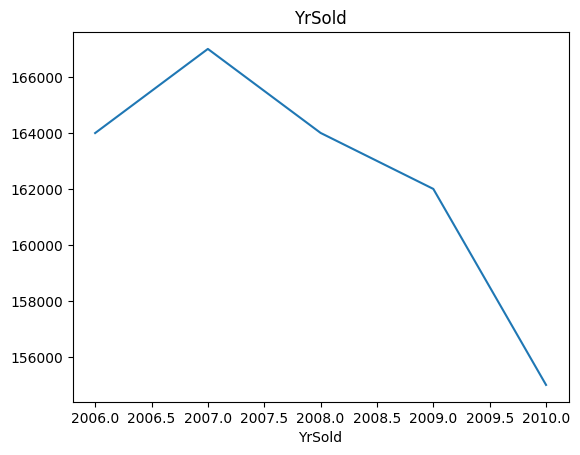

In [53]:
for yrfeature in year_features:
   data.groupby(yrfeature)['SalePrice'].median().plot()
   plt.title(yrfeature)
   plt.show()

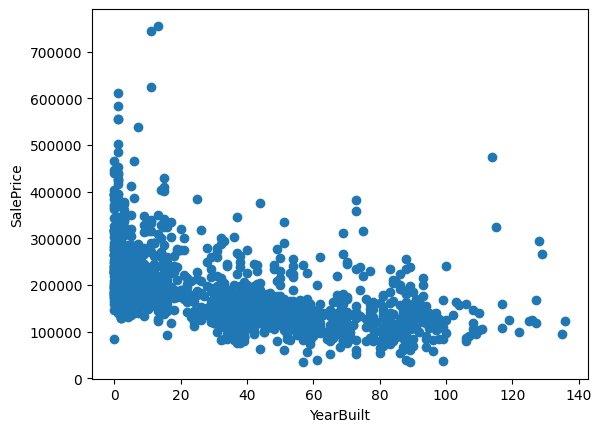

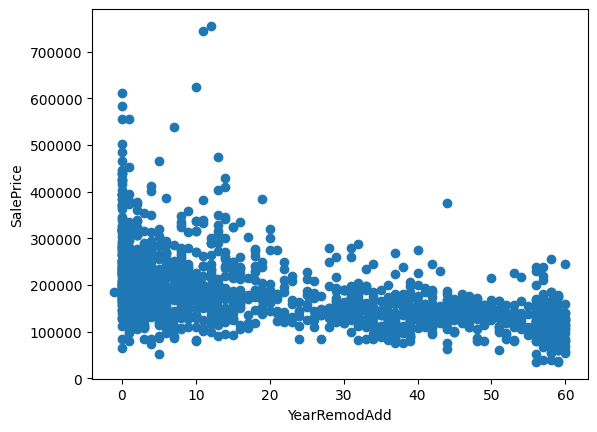

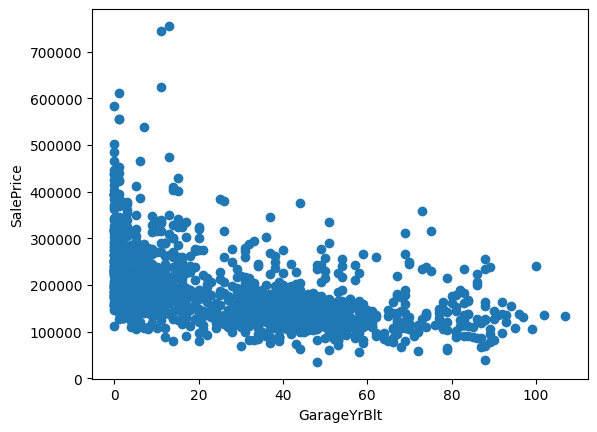

In [55]:
# explore more on year date columns after calculating difference with year sold
tempdata=data.copy()
for feature in year_features:
    if feature!='YrSold':
        ## We will capture the difference between year variable and year the house was sold for
        tempdata[feature]=tempdata['YrSold']-tempdata[feature]

        plt.scatter(tempdata[feature],tempdata['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

There is visible relationship between decreasing sales prices with passing years

In [84]:
# capture discrete variables and check for relationship with SalesPrice

discrete_features = [feature for feature in num_features if(len(data[feature].unique()) <25 and feature not in year_features)]
data[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


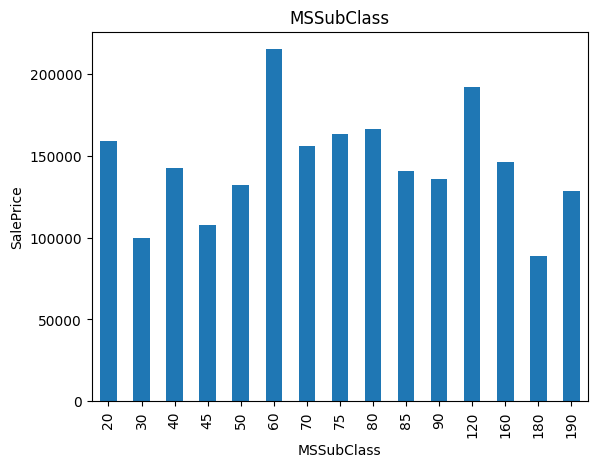

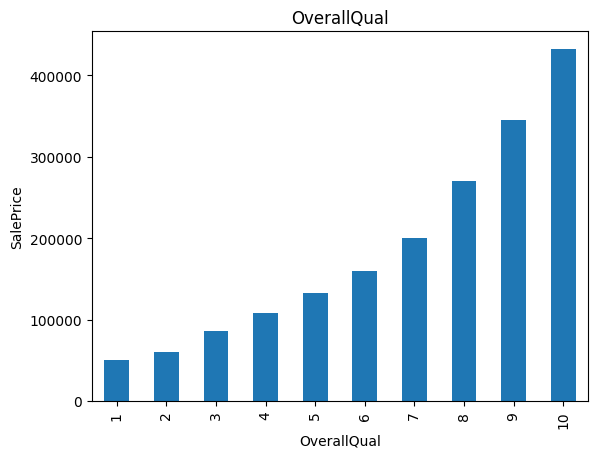

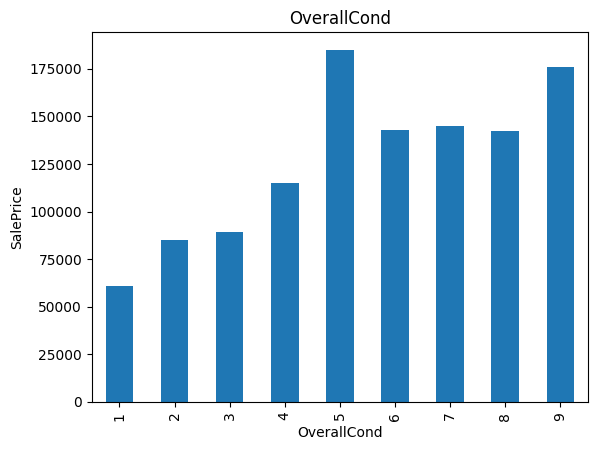

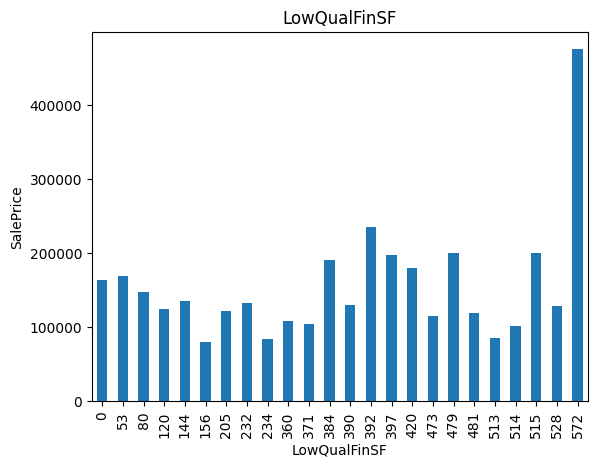

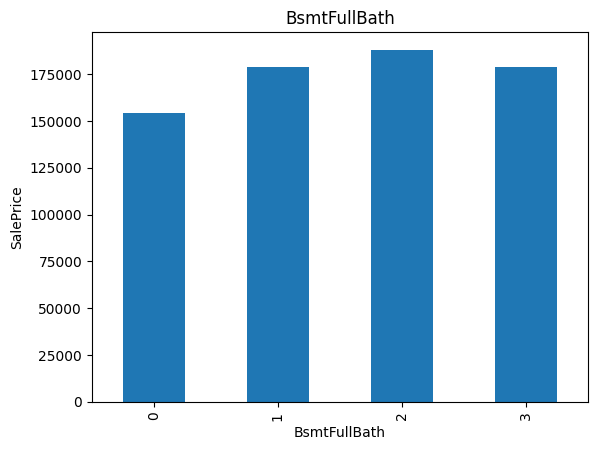

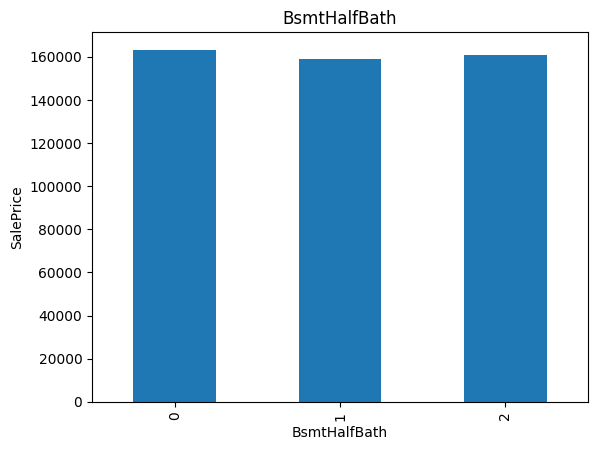

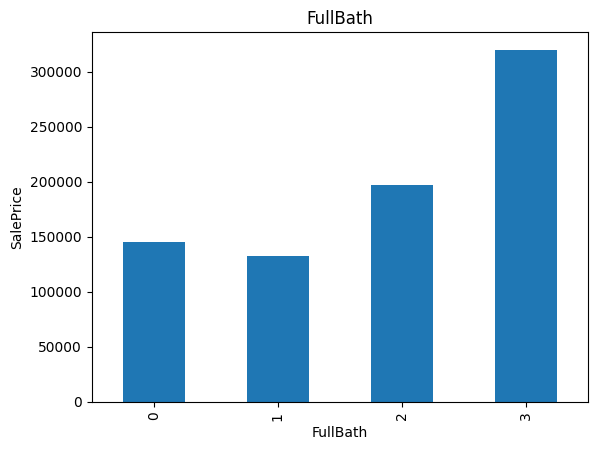

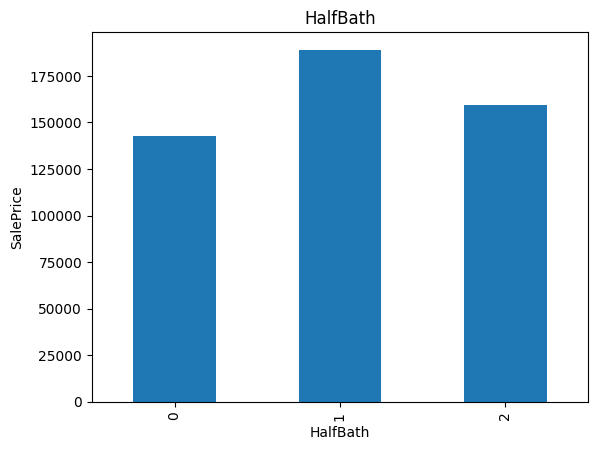

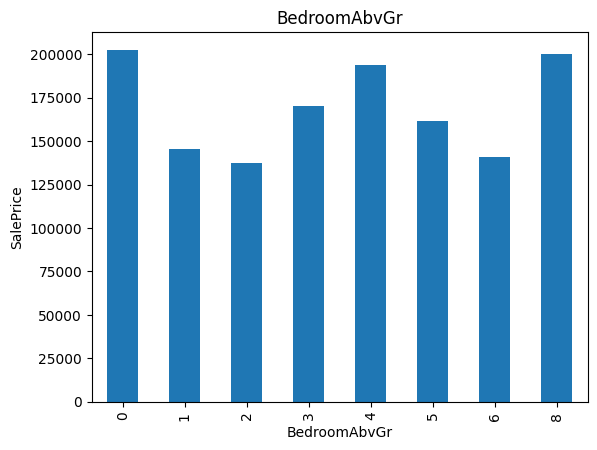

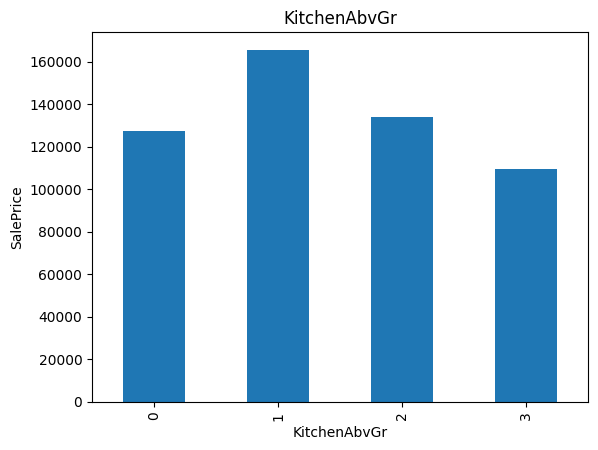

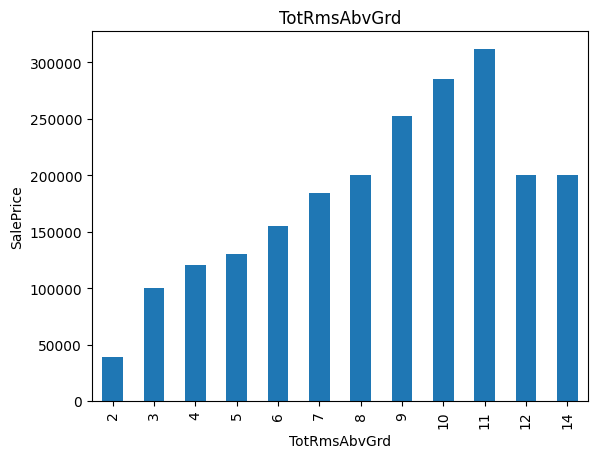

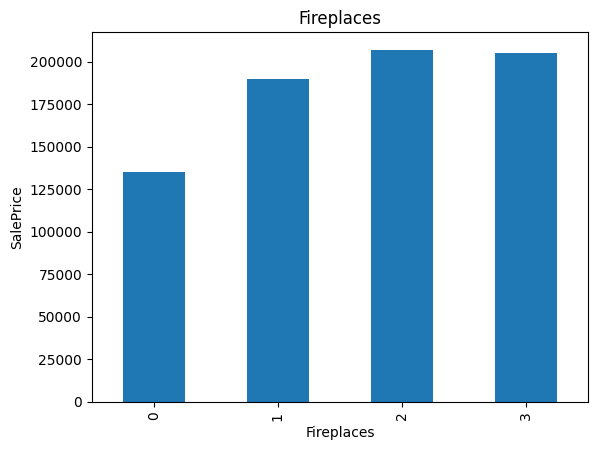

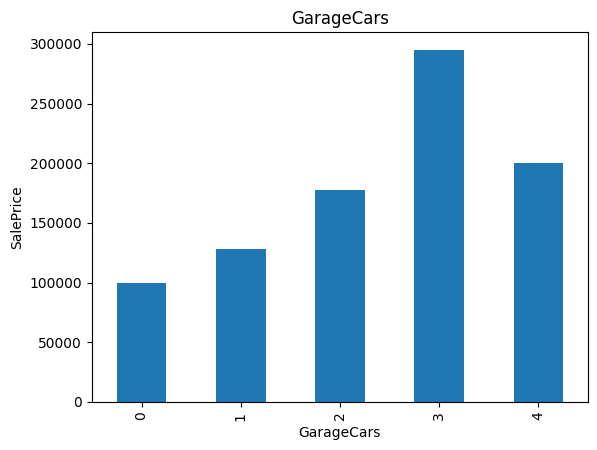

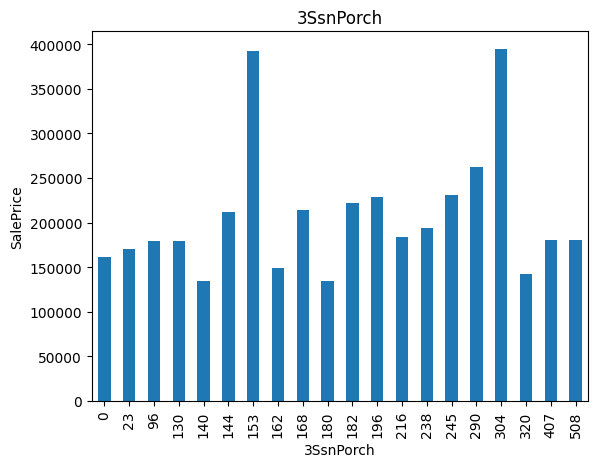

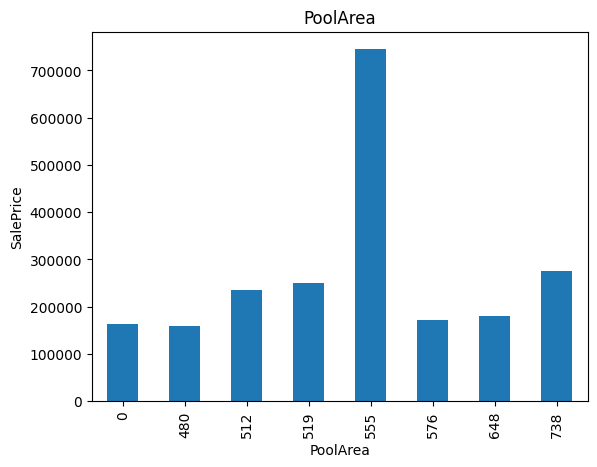

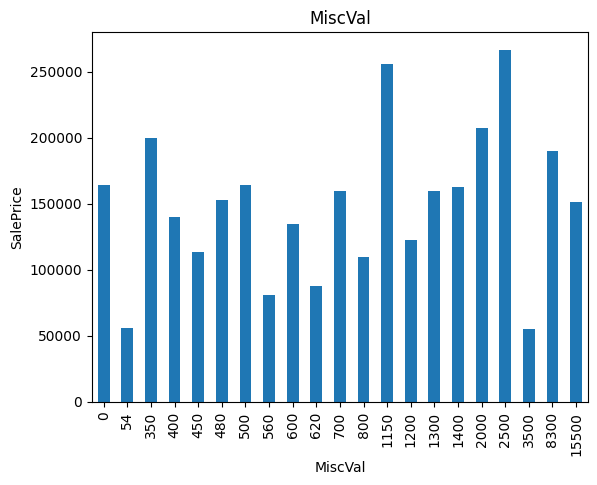

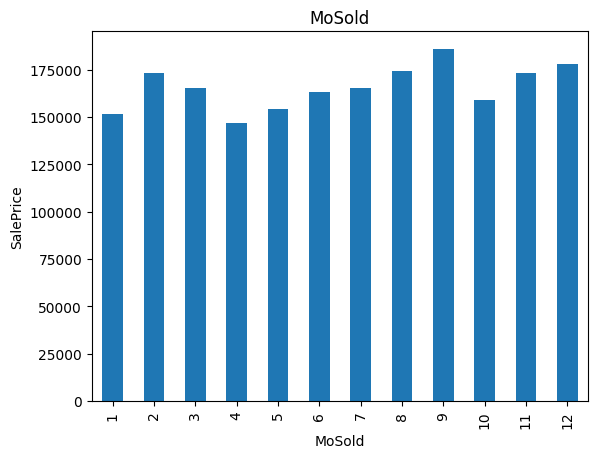

In [85]:
#plot relationship b/w salesprices and discrete variables

for feature in discrete_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

There is relationship between discrete variables with Sales Prices

In [86]:
# Capture continuous variables
cont_features = [feature for feature in num_features if feature not in (discrete_features+year_features+['Id','SalePrice'])]
cont_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

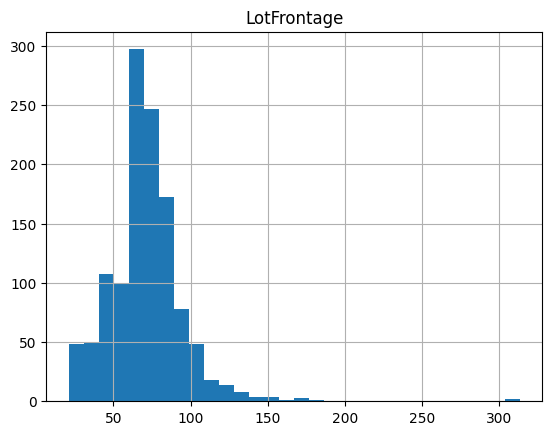

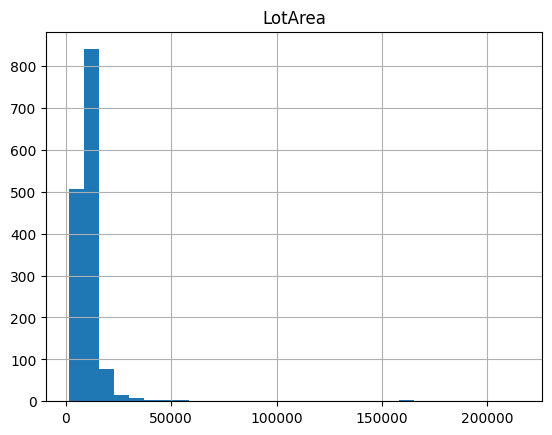

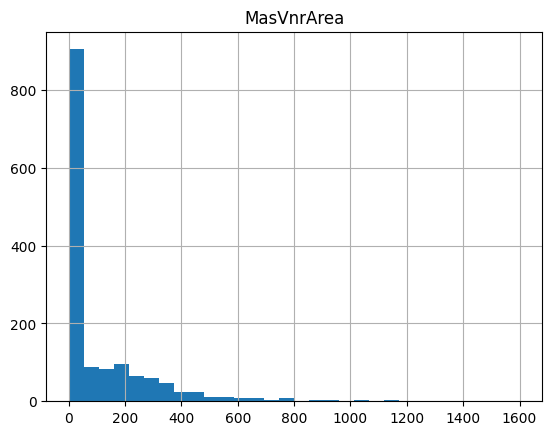

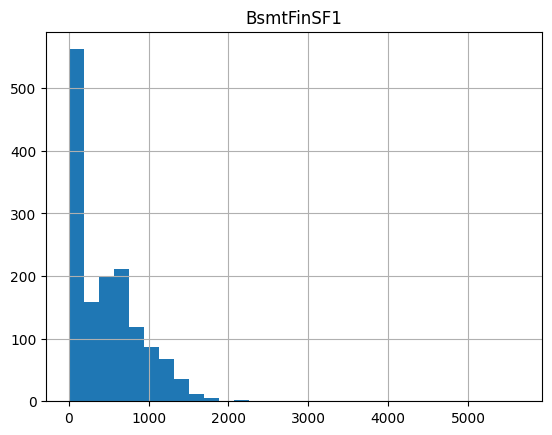

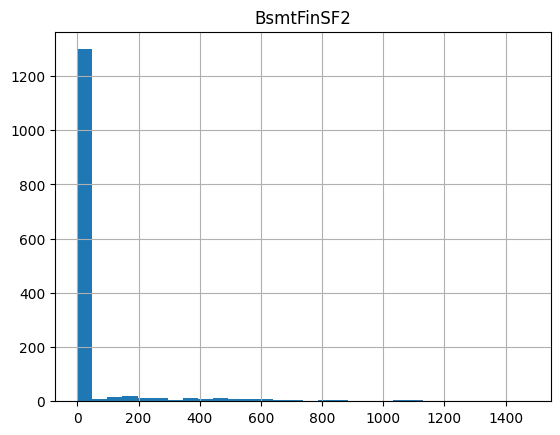

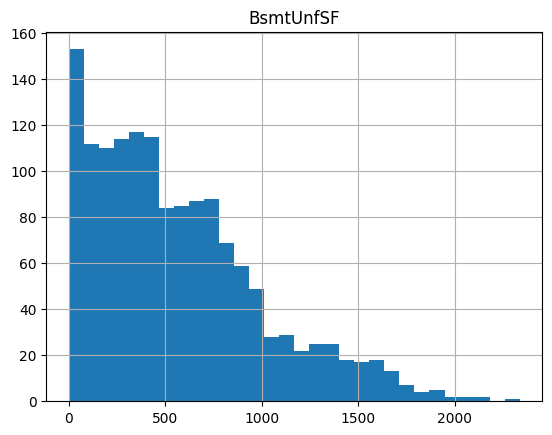

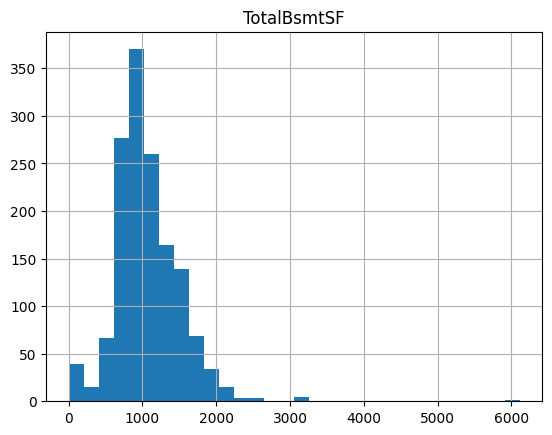

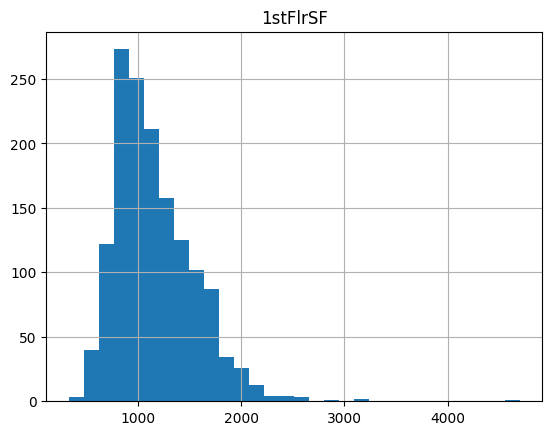

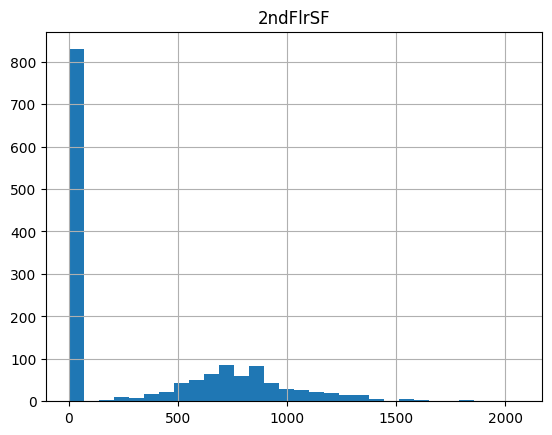

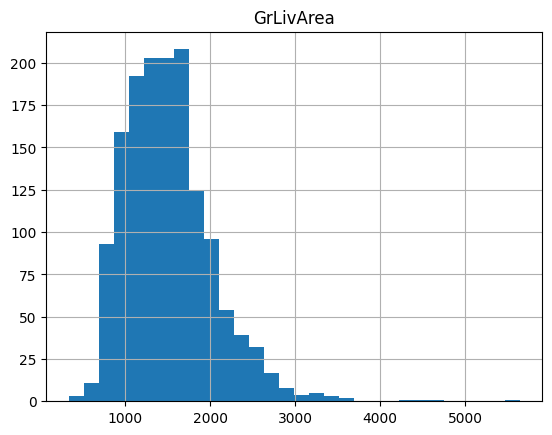

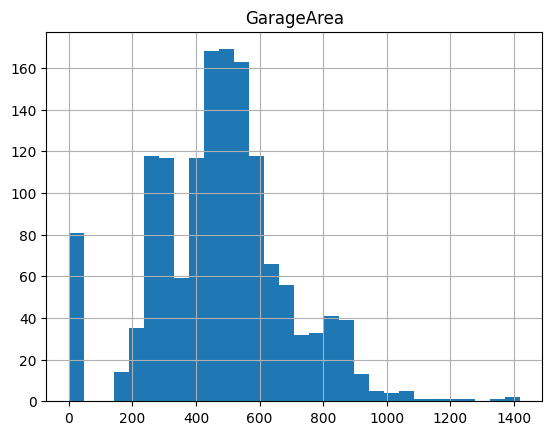

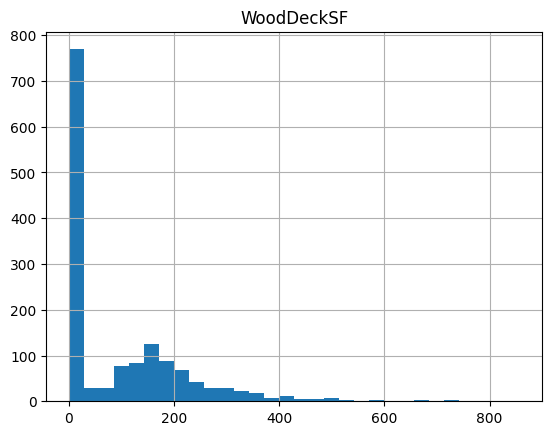

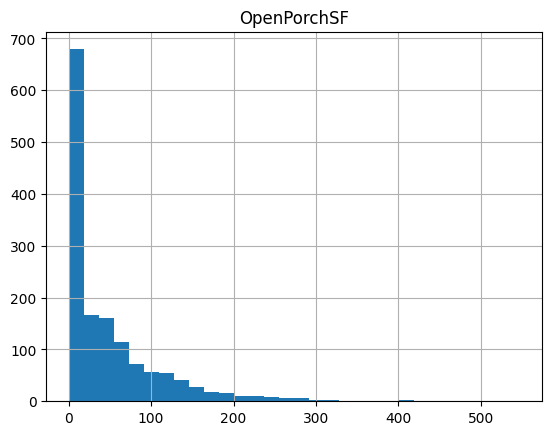

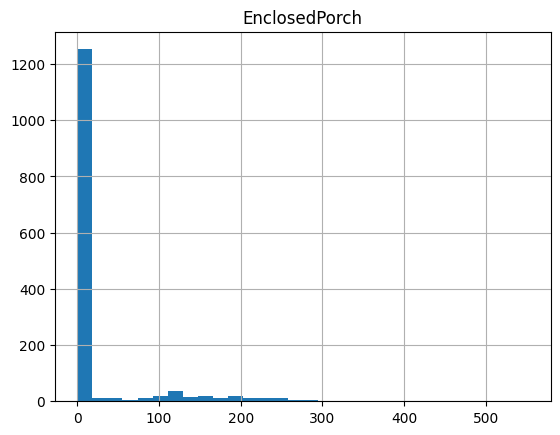

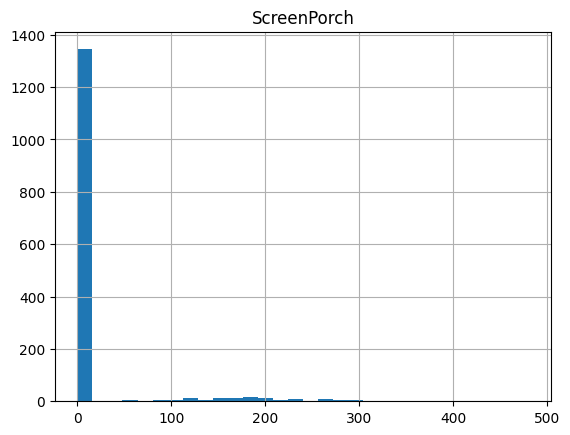

In [87]:
# Analyze relationship between Sales Price and continuous variables
for feature in cont_features:
    data[feature].hist(bins = 30)
    plt.title(feature)
    plt.show()

Data is visibley right-skewed and requires data transformation before data modelling

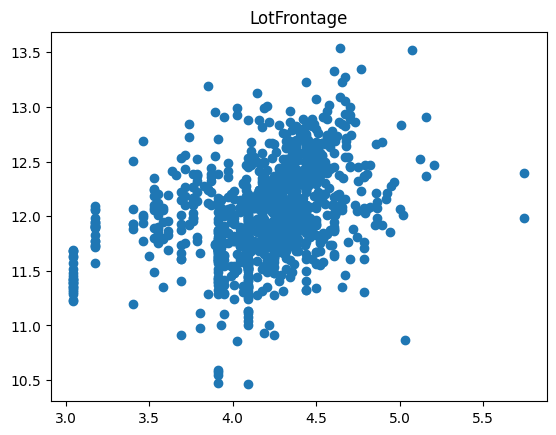

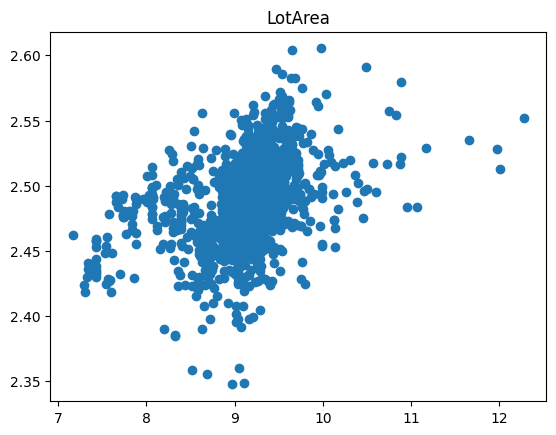

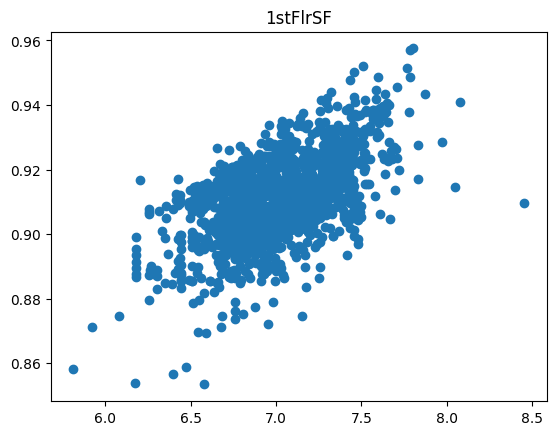

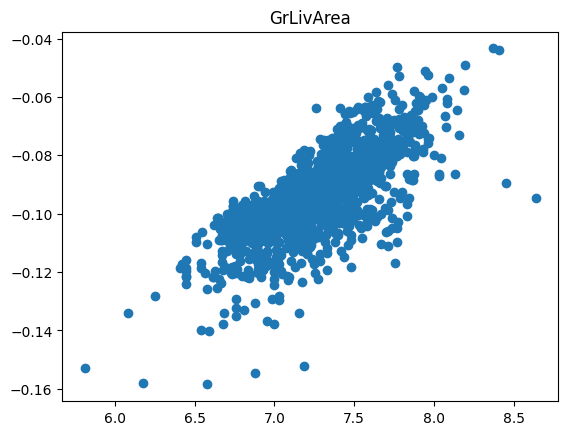

In [88]:
## Feature Trasnformation to observe to transform data into gaussian distribution
tempdata= data.copy()
for feature in cont_features:
    if (0 not in tempdata[feature].unique()):
        tempdata[feature] = np.log(tempdata[feature])
        tempdata['SalePrice'] = np.log(tempdata['SalePrice'])
        plt.scatter(tempdata[feature], tempdata['SalePrice'])
        plt.title(feature)
        plt.show()

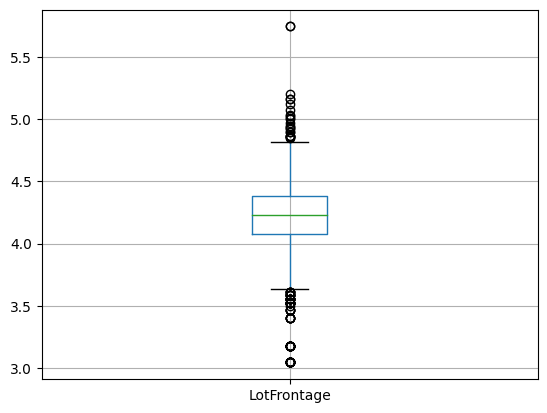

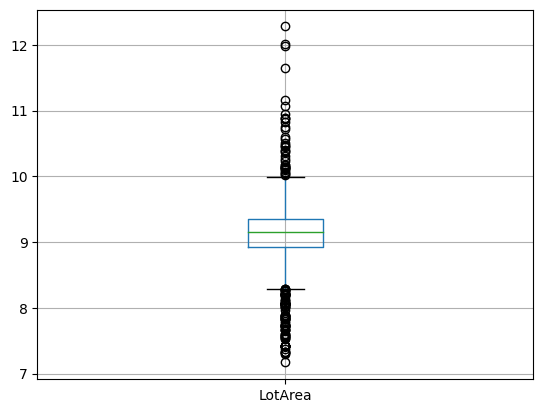

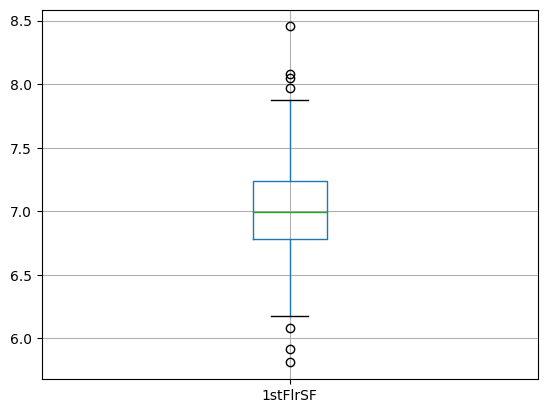

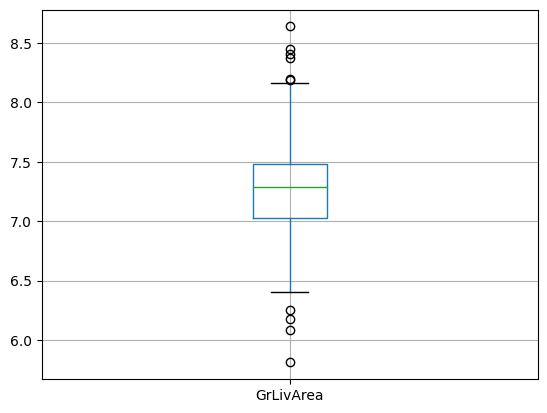

In [94]:
#Identify Outliers
tempdata = data.copy()
for feature in cont_features:
    if 0 not in data[feature].unique():
      tempdata[feature] = np.log(tempdata[feature])
      tempdata.boxplot(column=feature)
      plt.show()

In [97]:
# Categorical variables

categ_features =[feature for feature in data.columns if data[feature].dtypes =='O']
data[categ_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [105]:
# look at number of categories present in each categorical feature

for feature in categ_features:
    print("{} : {} categories".format(feature,len(data[feature].unique())))

MSZoning : 5 categories
Street : 2 categories
Alley : 3 categories
LotShape : 4 categories
LandContour : 4 categories
Utilities : 2 categories
LotConfig : 5 categories
LandSlope : 3 categories
Neighborhood : 25 categories
Condition1 : 9 categories
Condition2 : 8 categories
BldgType : 5 categories
HouseStyle : 8 categories
RoofStyle : 6 categories
RoofMatl : 8 categories
Exterior1st : 15 categories
Exterior2nd : 16 categories
MasVnrType : 4 categories
ExterQual : 4 categories
ExterCond : 5 categories
Foundation : 6 categories
BsmtQual : 5 categories
BsmtCond : 5 categories
BsmtExposure : 5 categories
BsmtFinType1 : 7 categories
BsmtFinType2 : 7 categories
Heating : 6 categories
HeatingQC : 5 categories
CentralAir : 2 categories
Electrical : 6 categories
KitchenQual : 4 categories
Functional : 7 categories
FireplaceQu : 6 categories
GarageType : 7 categories
GarageFinish : 4 categories
GarageQual : 6 categories
GarageCond : 6 categories
PavedDrive : 3 categories
PoolQC : 4 categories
Fen

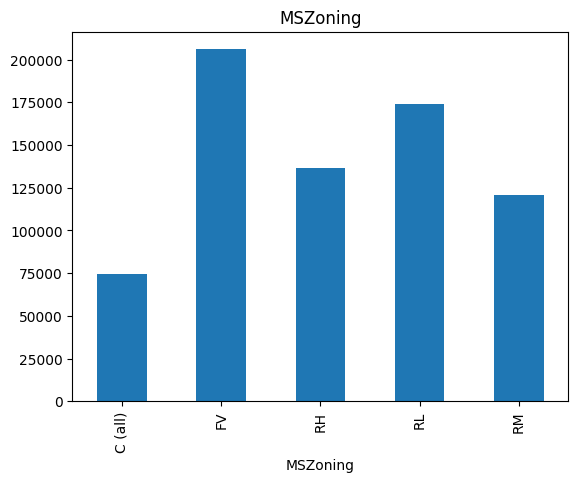

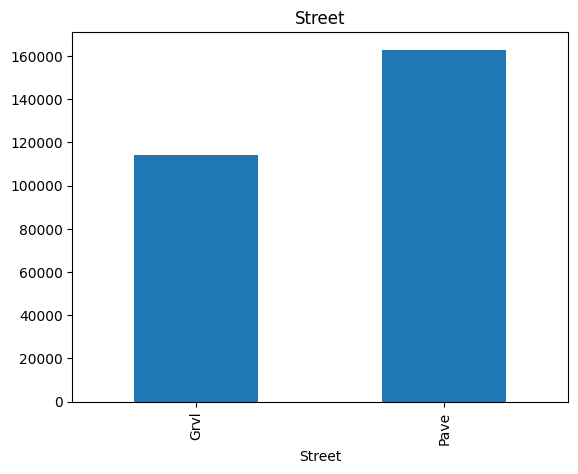

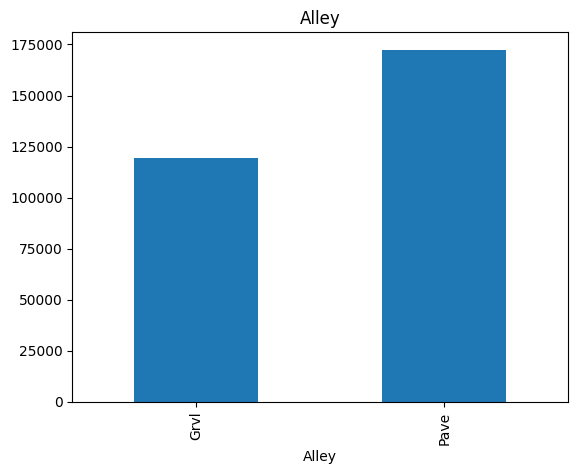

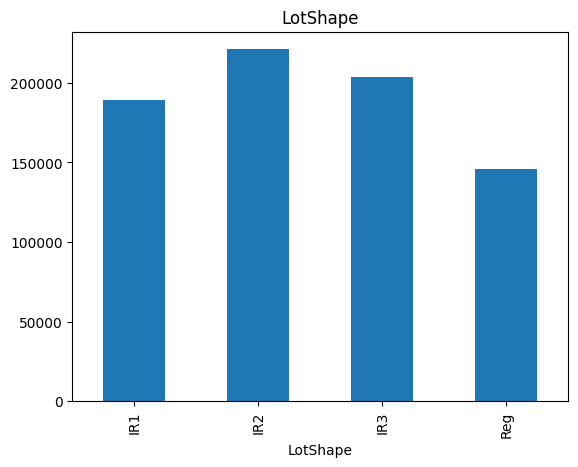

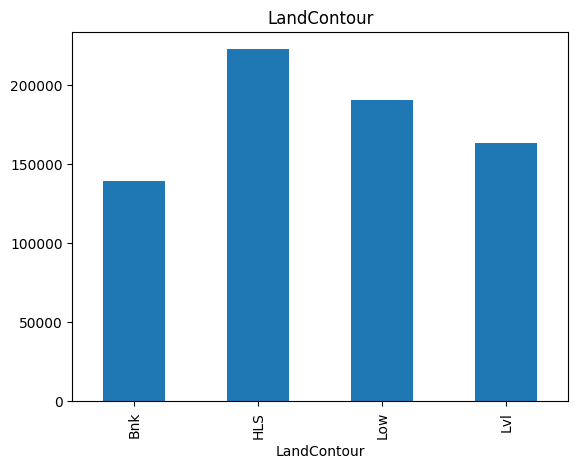

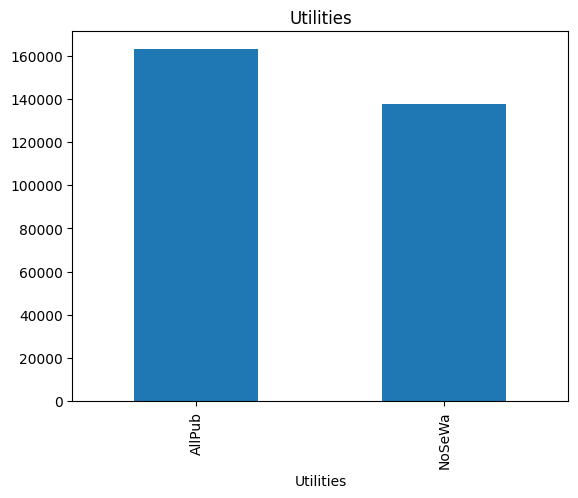

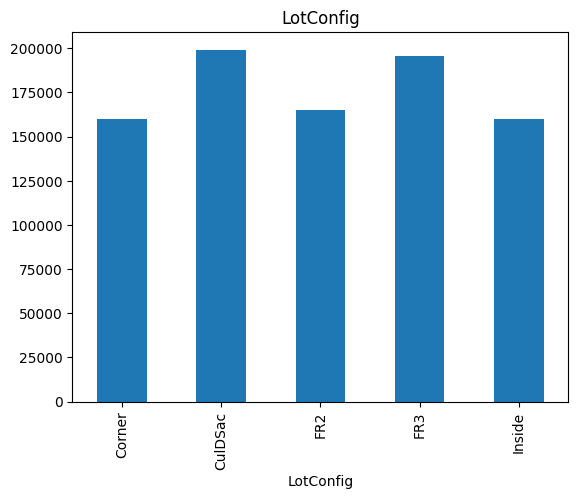

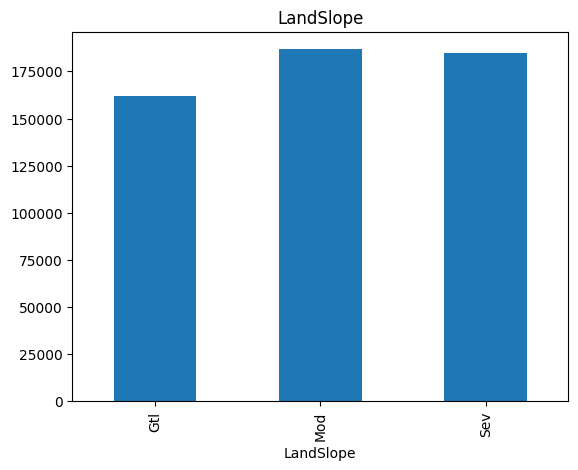

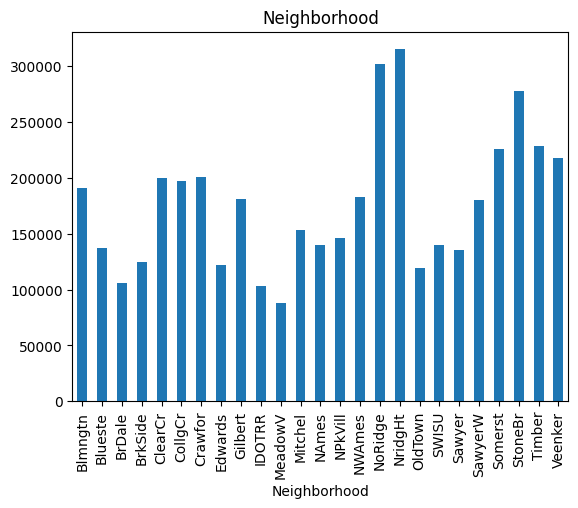

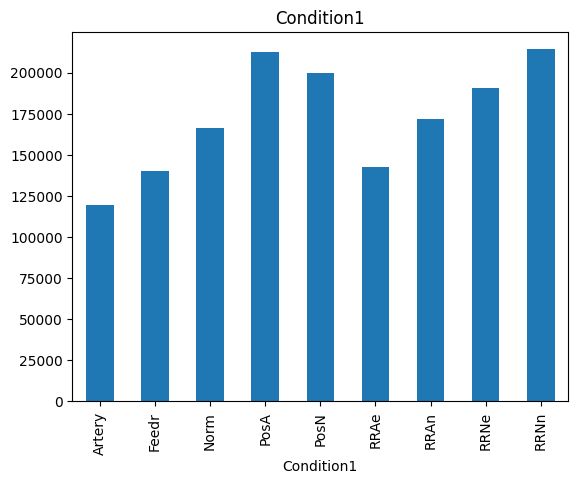

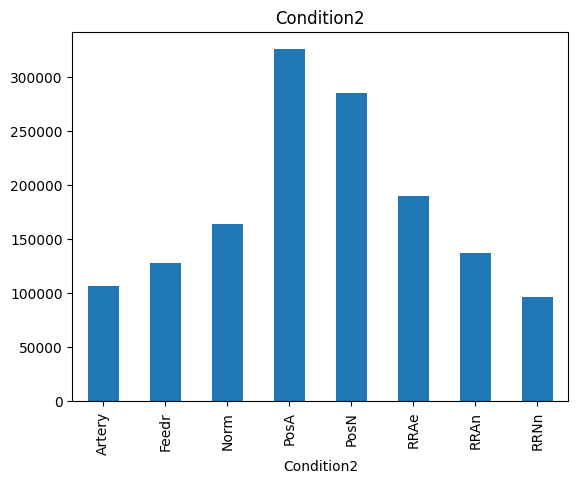

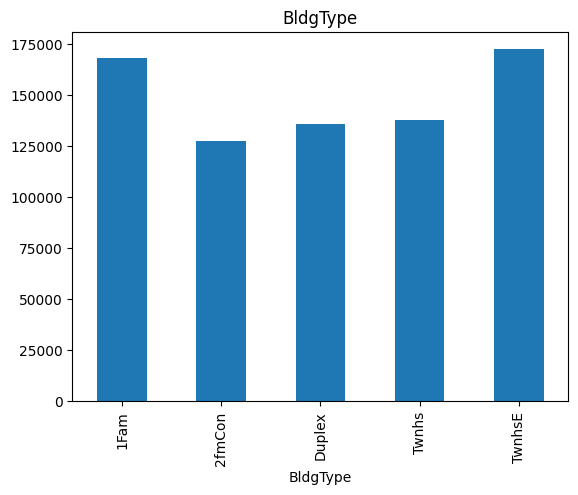

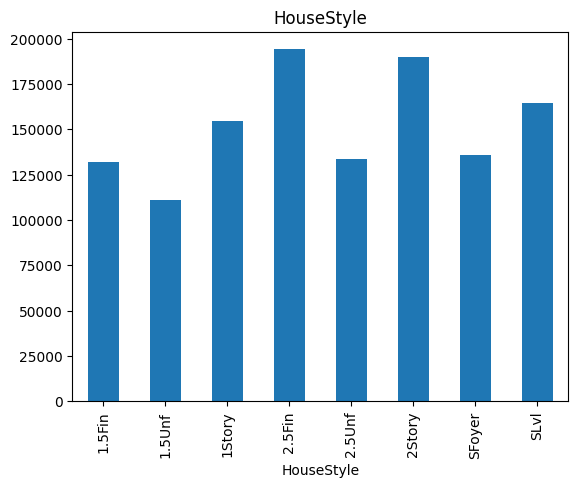

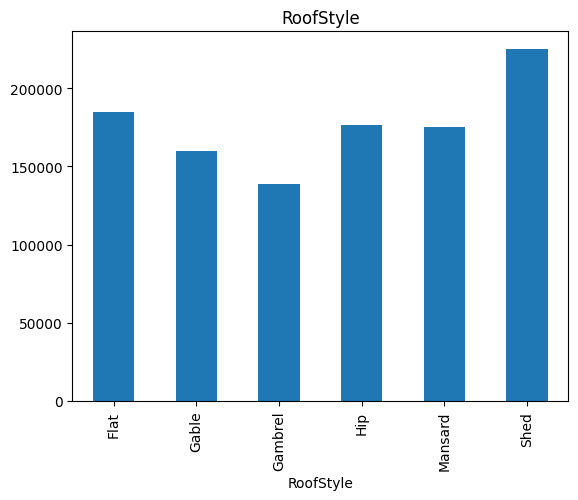

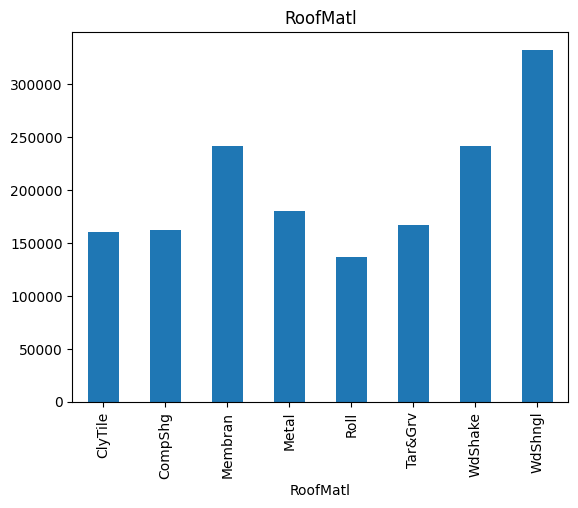

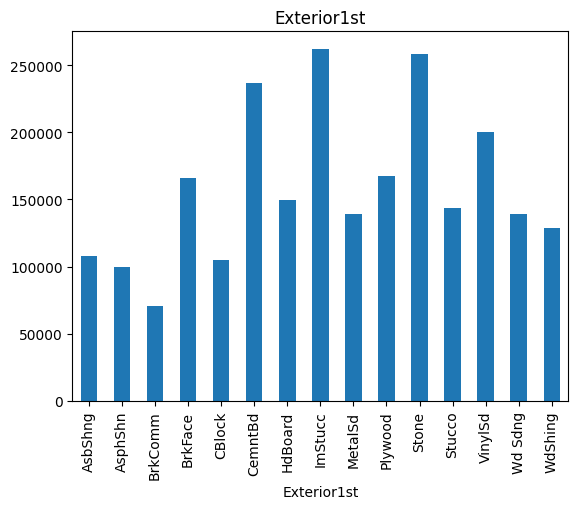

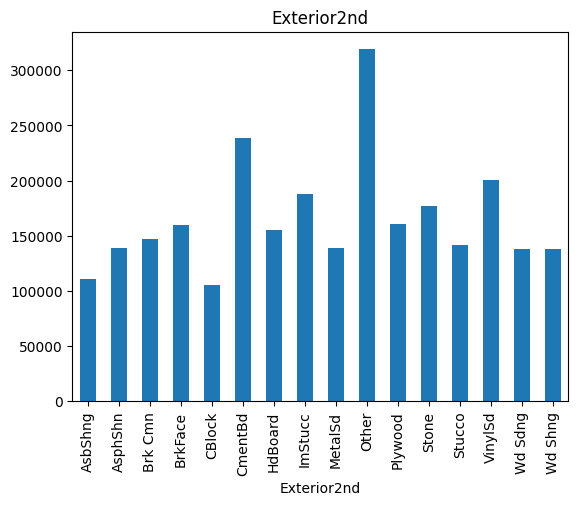

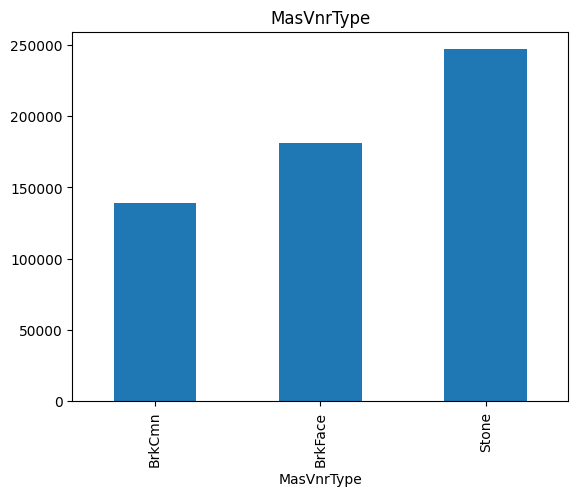

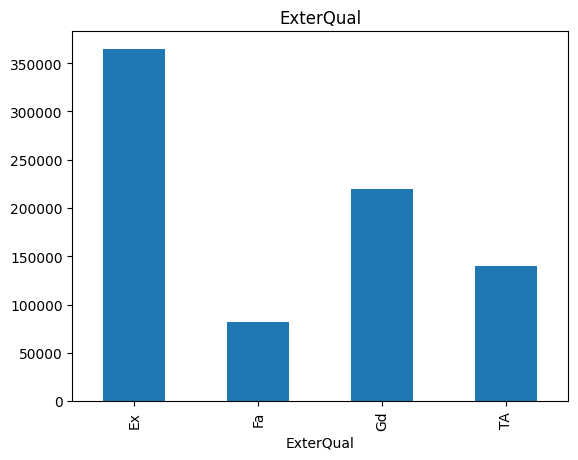

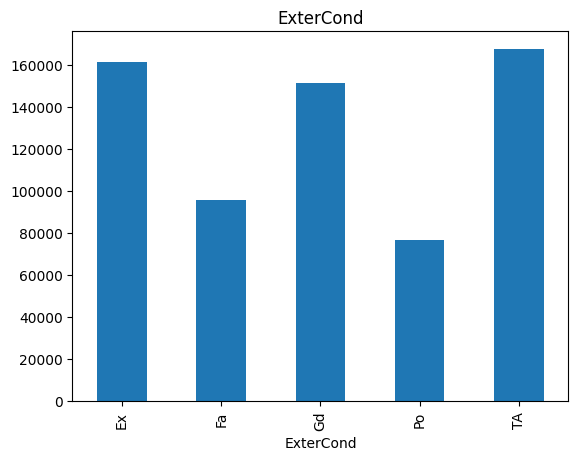

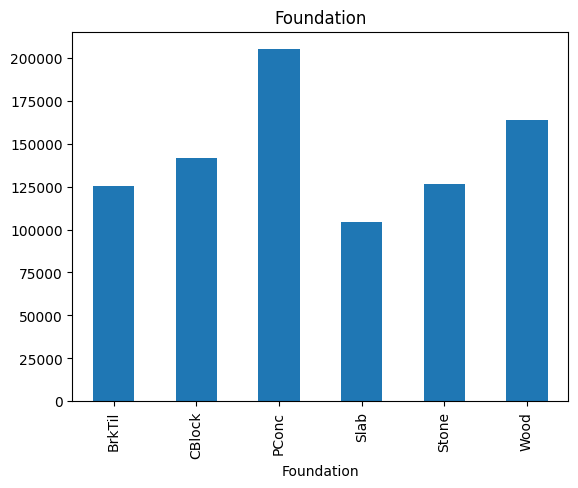

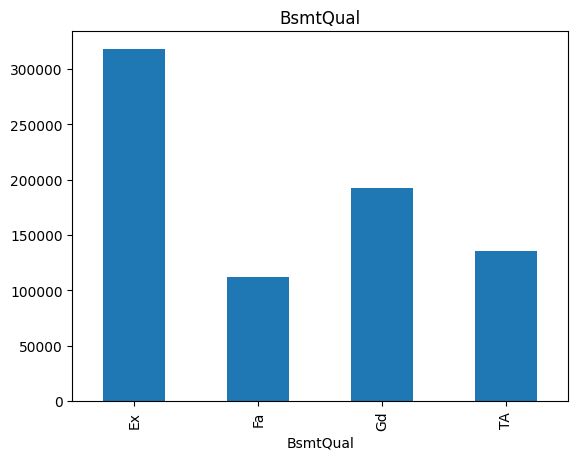

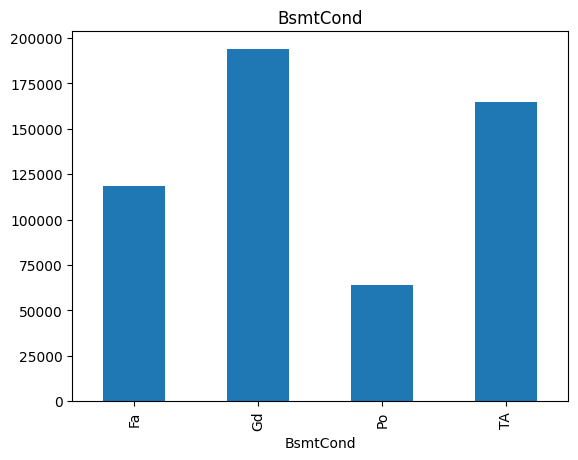

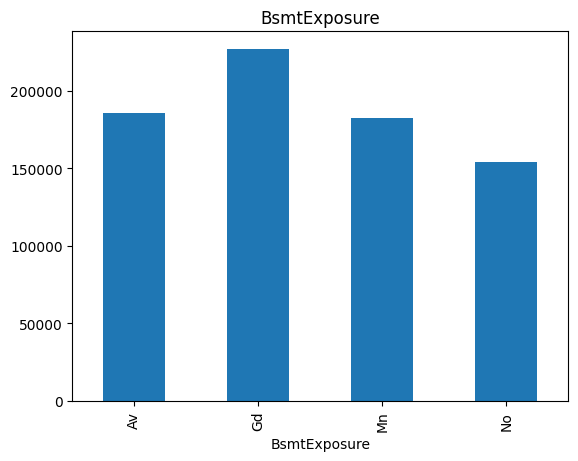

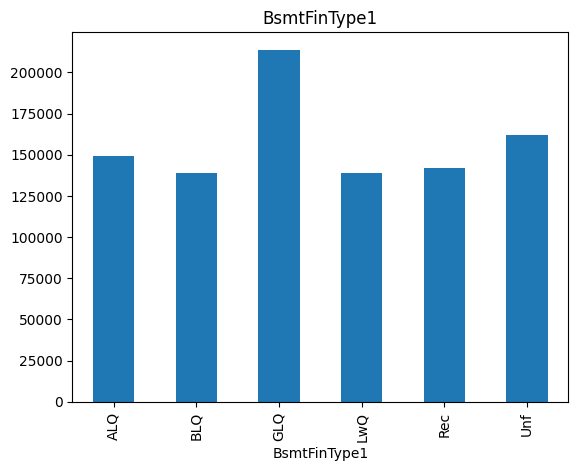

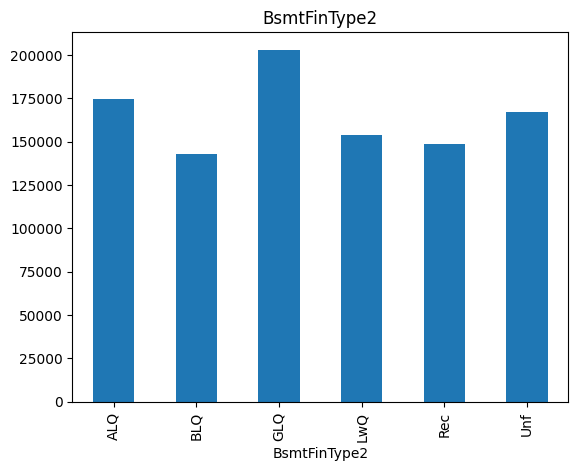

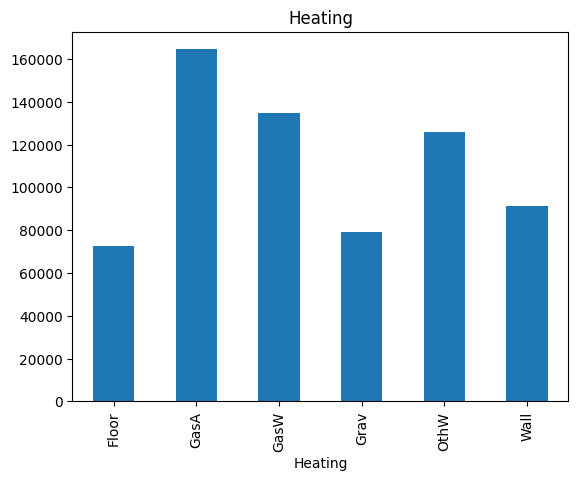

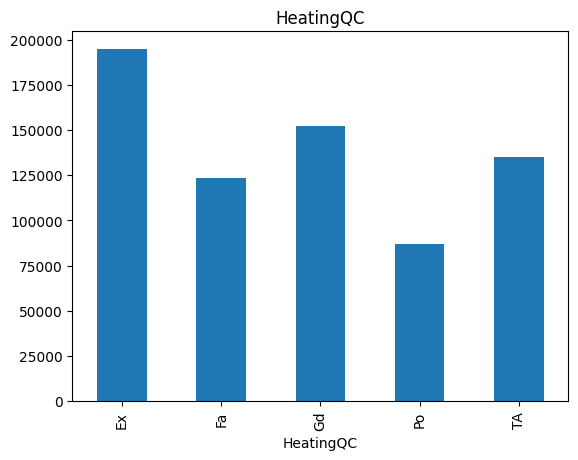

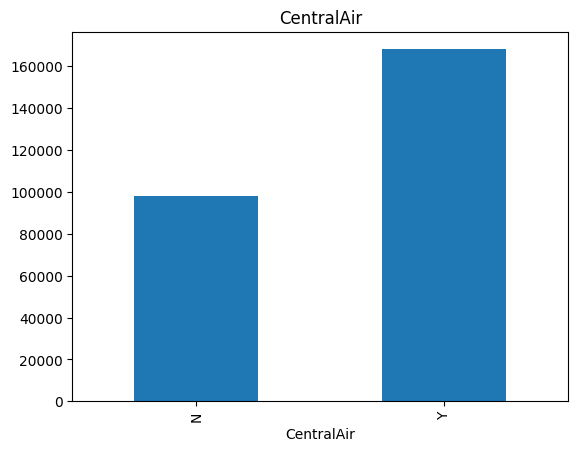

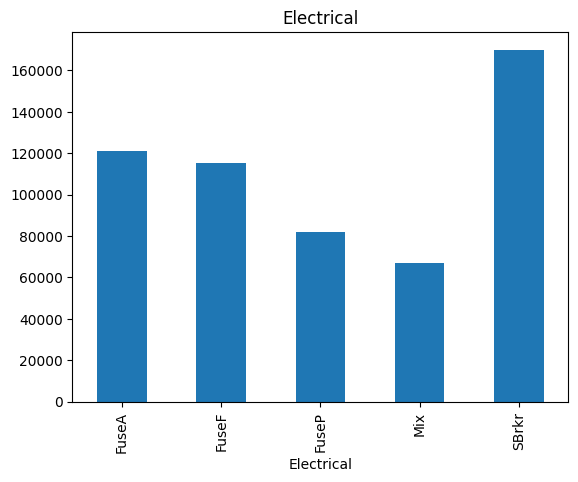

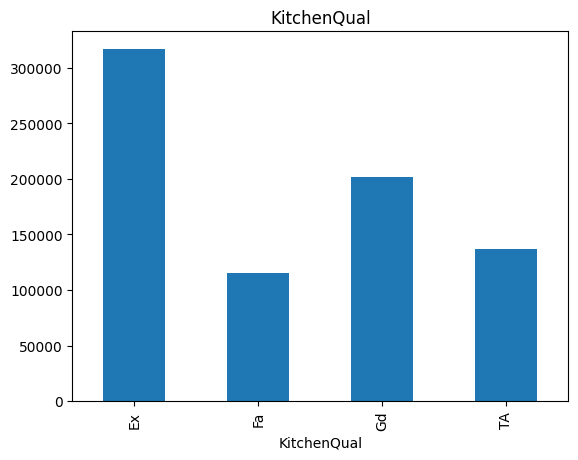

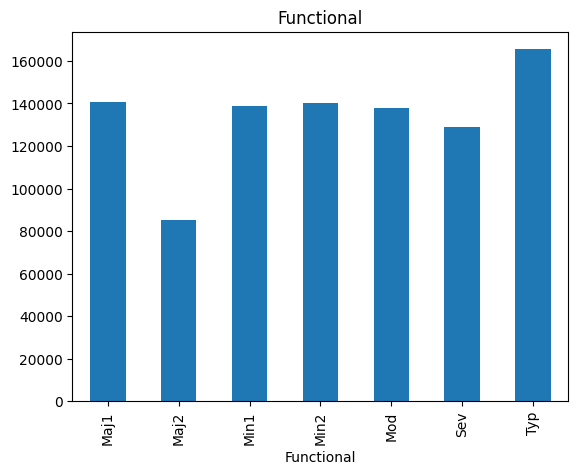

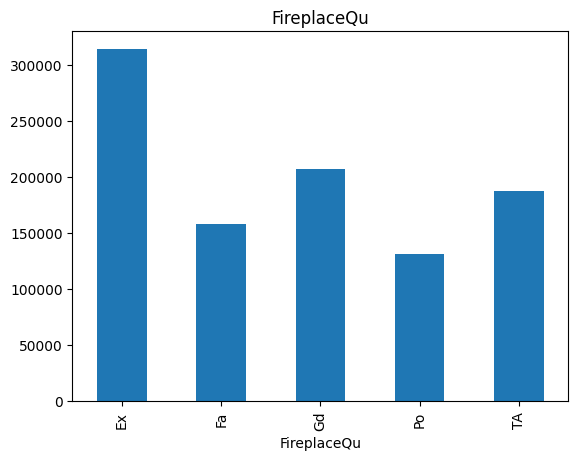

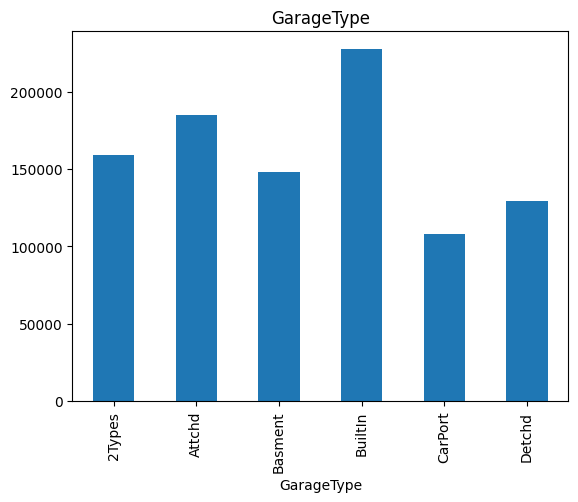

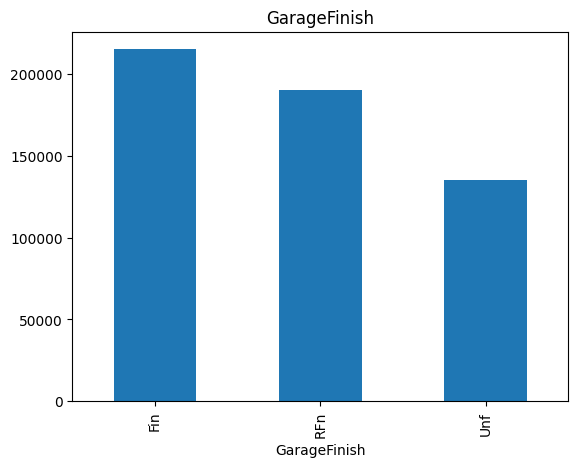

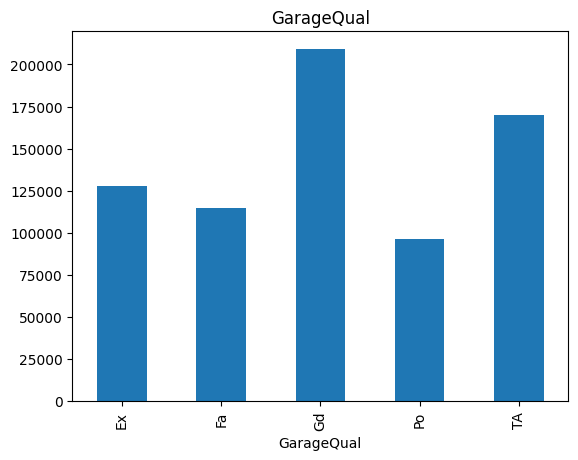

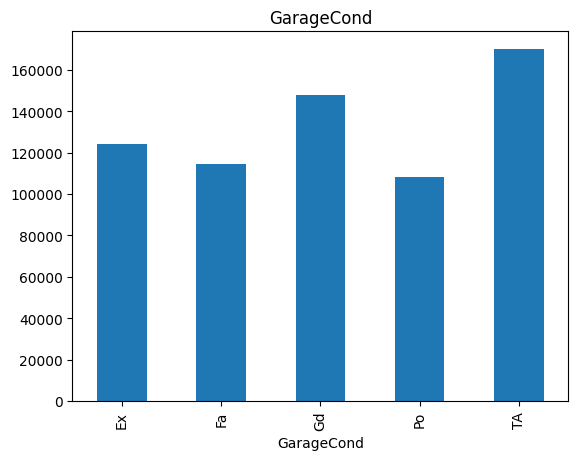

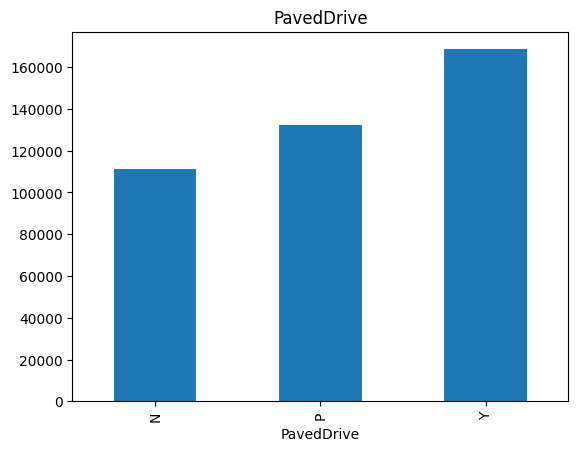

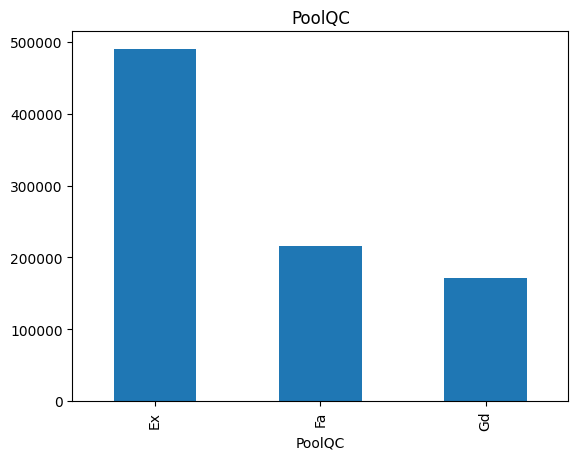

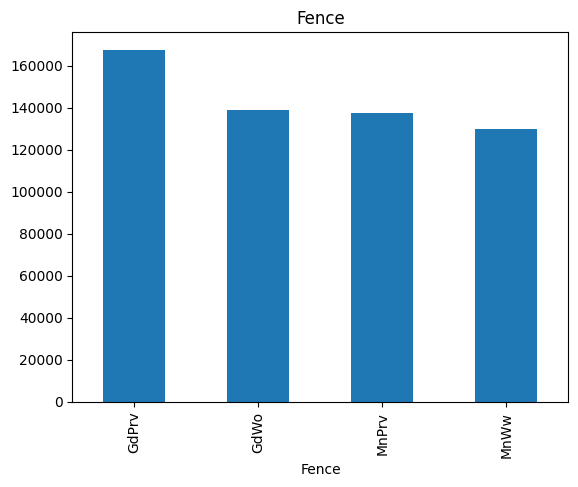

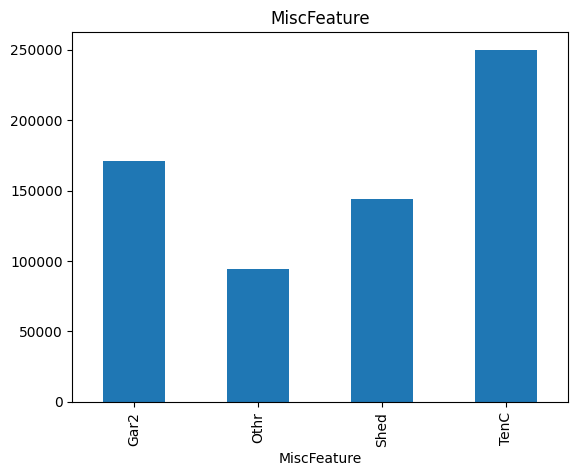

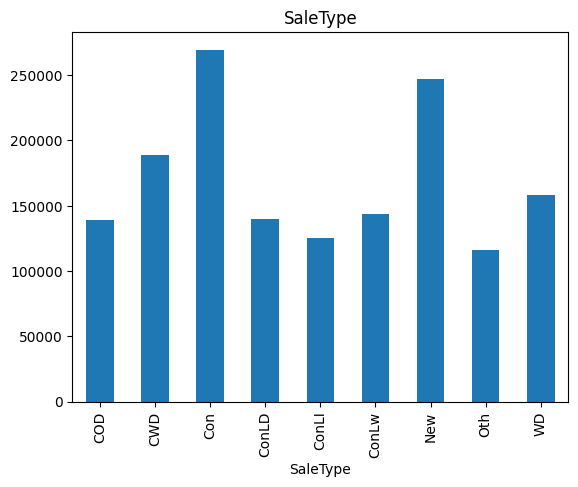

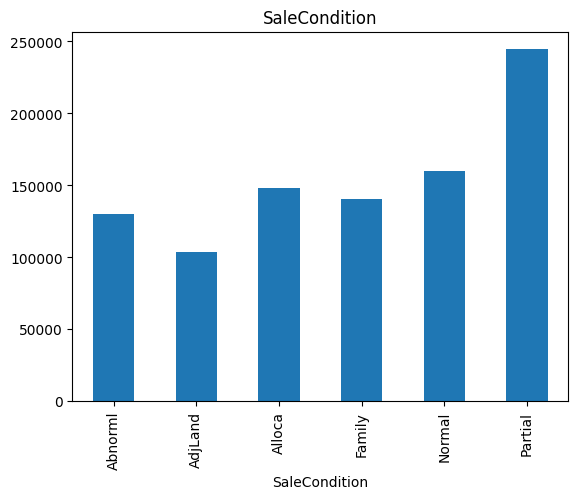

In [109]:
for feature in categ_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()